# Shape y Reshape

El **shape** nos habla de la "forma" (mejor dicho, estructura) que tiene el conjunto que estemos manejando.

In [2]:
import numpy as np

Para entender esto mejor, generemos una matriz 3x2 con ``randint``.

In [3]:
matrix = np.random.randint(1, 10, (3, 2))
matrix

array([[7, 7],
       [9, 4],
       [5, 3]])

Veamos la propiedad ``shape``de ``matrix``.

In [4]:
matrix.shape

(3, 2)

``ndarray.shape`` **indica** la cantidad de elementos que tiene el array en cada dimensión. Entendamos esto mejor.

En este caso, declaramos nuestra colección ``matrix`` con 3 elementos en la primera componente (las filas), y dos elementos en la segunda componente (las columnas) (recordemos el pedazo de código del ``randint`` donde le indicamos que sea 3x2). Como la tupla tiene únicamente dos elementos, esto nos indica que la dimensión del array es 2.

Ahora bien, podemos manipular la forma (shape) que tiene nuestra colección después de haberla declarado, esto lo logramos con el método ``reshape``.

In [5]:
reshaped_matrix = matrix.reshape(1, 6)
reshaped_matrix

array([[7, 7, 9, 4, 5, 3]])

## Cambiando a formas incompatibles (esto da error.)

Observemos bien qué pasa cuando se intenta cambiar la forma de un array a una que en la que no "cabría".

Esto lo sabemos teniendo en cuenta la cantidad de elementos que caben en una forma. Por ejemplo, como partimos de un array 3x2, haciendo la multiplicación nos damos cuenta de que este array tiene cabida para 6 elementos. Por lo tanto, no tiene sentido hacer caber 6 elementos en un contenedor que da para 5.

In [10]:
try:
    reshaped_matrix = matrix.reshape(1, 5)
    reshaped_matrix
except ValueError as error:
    print("Error:", error)

Error: cannot reshape array of size 6 into shape (1,5)


Numpy nos tira un error. No se puede cambiar la forma así a la ligera, sino que hay que estar consciente de lo que se hace y la forma en la que se desea obtener los datos.

Pero bueno, no todo es tan grave. Podemos trasponer el array de la siguiente forma:

In [7]:
reshaped_matrix = matrix.reshape(2, 3)
reshaped_matrix

array([[7, 7, 9],
       [4, 5, 3]])

Todo esto es muy bonito, pero surge la siguiente pregunta:

| ¿Cómo ``reshape`` re-acomoda los datos? ¿Qué pautas sigue?

## Entendiendo cómo se mueven los datos

Por defecto, ``reshape`` itera teniendo los datos de fila en fila. Esto es al "estilo C".

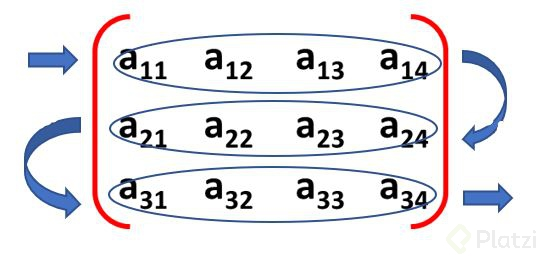

Sin embargo, no es la única forma de iterar sobre el array. También es posible iterar "a la Fortran", que sería columna por columna.

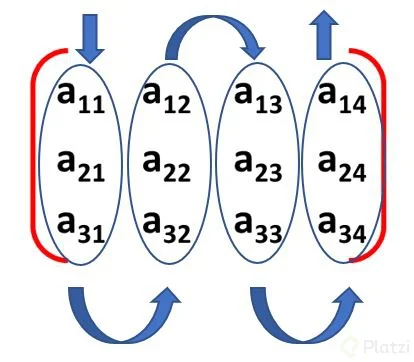

La manera en la que ``reshape`` itera la podemos cambiar de acuerdo a nuestras necesidades, pasándolo como segundo parámetro el caracter que corresponda:

* ``'C'`` para iterar al estilo C.
* ``'F'`` para iterar al estilo Fortran.
* ``'A'`` para dejar al sistema decidir.

Esta última opción elige entre ``'C'`` y ``'F'``, dependiendo de cuál sea más eficiente en memoria.

In [13]:
print("Before reshaping:\n", matrix)
print("'C' 2x3 reshaping:\n", np.reshape(matrix, (2, 3)))
print("'F' 2x3 reshaping:\n", np.reshape(matrix, (2, 3), 'F'))

Before reshaping:
 [[7 7]
 [9 4]
 [5 3]]
'C' 2x3 reshaping:
 [[7 7 9]
 [4 5 3]]
'F' 2x3 reshaping:
 [[7 5 4]
 [9 7 3]]
